# `1` import libraries                                                     

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler , MinMaxScaler

# Read/Load Data

In [2]:
DF = pd.read_csv('Desktop/taxi_trip_pricing.csv')

In [3]:
DF.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
DF.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [6]:
DF.dropna(inplace=True)

In [7]:
DF.duplicated().sum()

0

In [8]:
DF.isna().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

# EDA

In [9]:
DF.head(3)

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028


Text(0, 0.5, 'NO.transaction(Replication)')

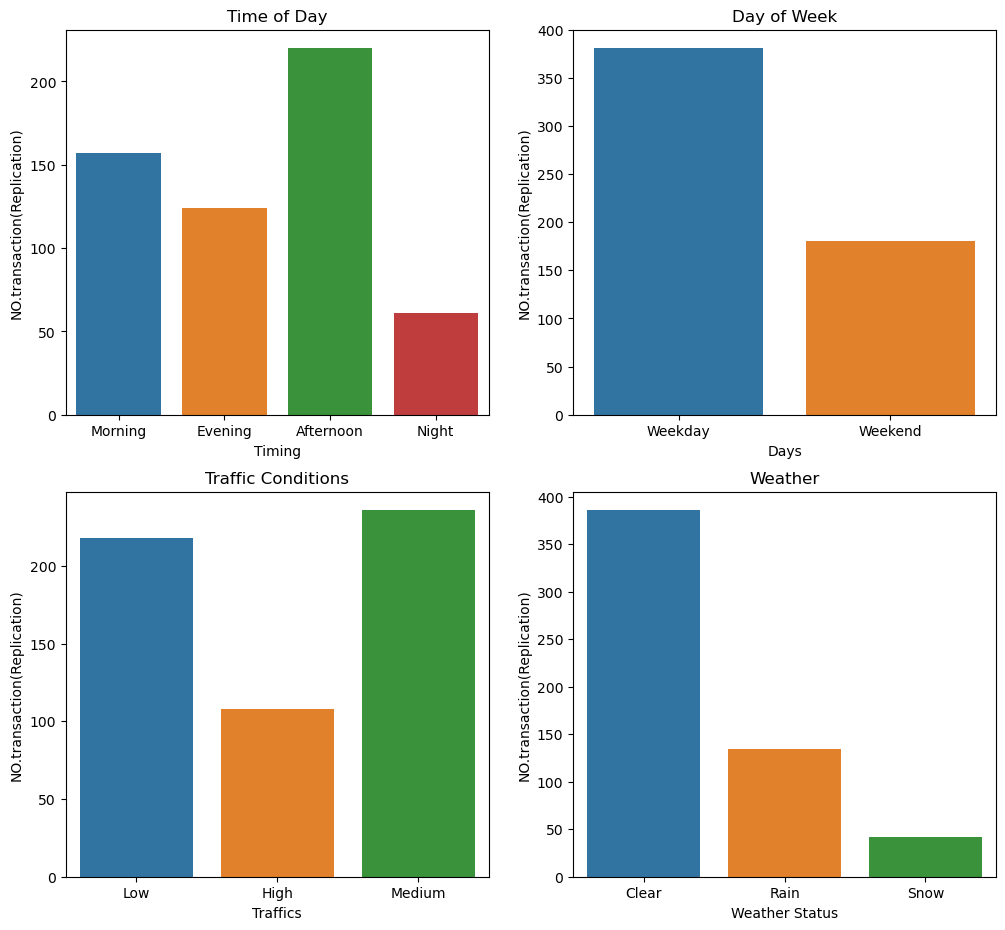

In [10]:
fig = plt .figure(figsize=(12,11))
gs=fig.add_gridspec(2,2)
# Time of Day
ax1=fig.add_subplot(gs[0,0])
sns.countplot(x=DF['Time_of_Day'])
plt.title('Time of Day')
plt.xlabel('Timing')
plt.ylabel('NO.transaction(Replication)')

ax2=fig.add_subplot(gs[0,1])
sns.countplot(x=DF['Day_of_Week'])
plt.title('Day of Week')
plt.xlabel('Days')
plt.ylabel('NO.transaction(Replication)')


ax1=fig.add_subplot(gs[1,0])
sns.countplot(x=DF['Traffic_Conditions'])
plt.title('Traffic Conditions')
plt.xlabel('Traffics')
plt.ylabel('NO.transaction(Replication)')

ax1=fig.add_subplot(gs[1,1])
sns.countplot(x=DF['Weather'])
plt.title('Weather')
plt.xlabel('Weather Status')
plt.ylabel('NO.transaction(Replication)')

Text(0.5, 1.0, 'Weather')

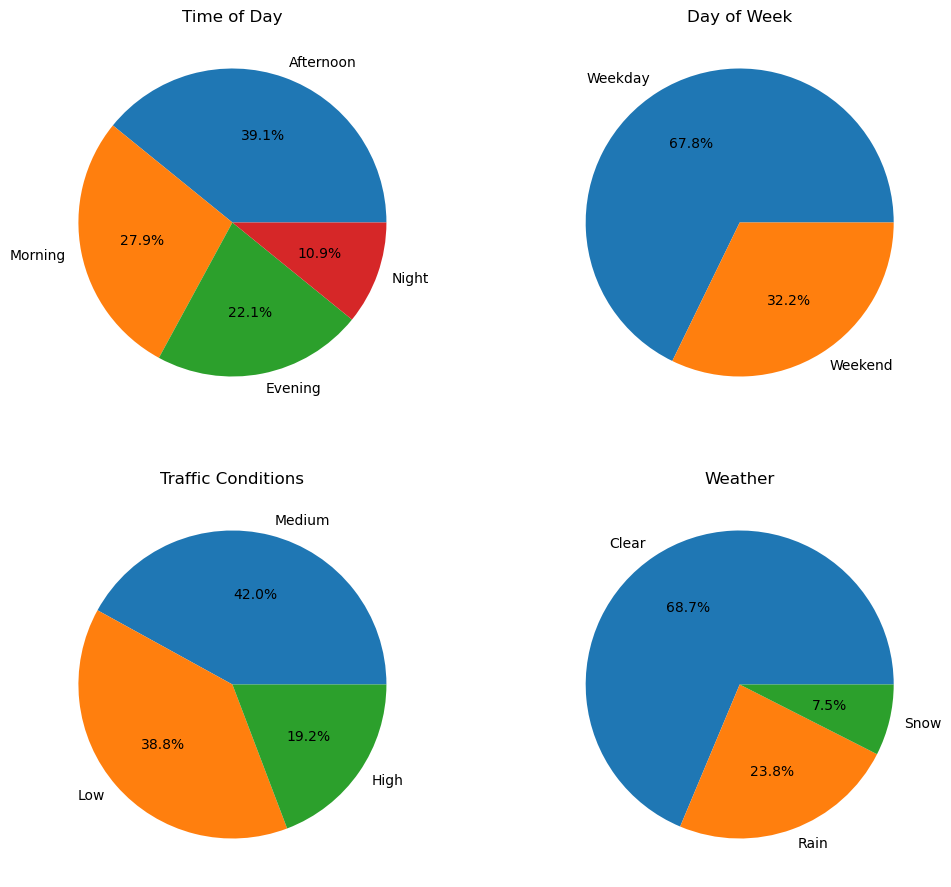

In [11]:
fig = plt .figure(figsize=(12,11))
gs=fig.add_gridspec(2,2)

ax1=fig.add_subplot(gs[0,0])
plt.pie(DF['Time_of_Day'].value_counts().values,labels=DF['Time_of_Day'].value_counts().index,autopct='%1.1f%%')
plt.title('Time of Day')


ax2=fig.add_subplot(gs[0,1])
plt.pie(DF['Day_of_Week'].value_counts().values,labels=DF['Day_of_Week'].value_counts().index,autopct='%1.1f%%')
plt.title('Day of Week')


ax1=fig.add_subplot(gs[1,0])
plt.pie(DF['Traffic_Conditions'].value_counts().values,labels=DF['Traffic_Conditions'].value_counts().index,autopct='%1.1f%%')
plt.title('Traffic Conditions')


ax1=fig.add_subplot(gs[1,1])
plt.pie(DF['Weather'].value_counts().values,labels=DF['Weather'].value_counts().index,autopct='%1.1f%%')
plt.title('Weather')


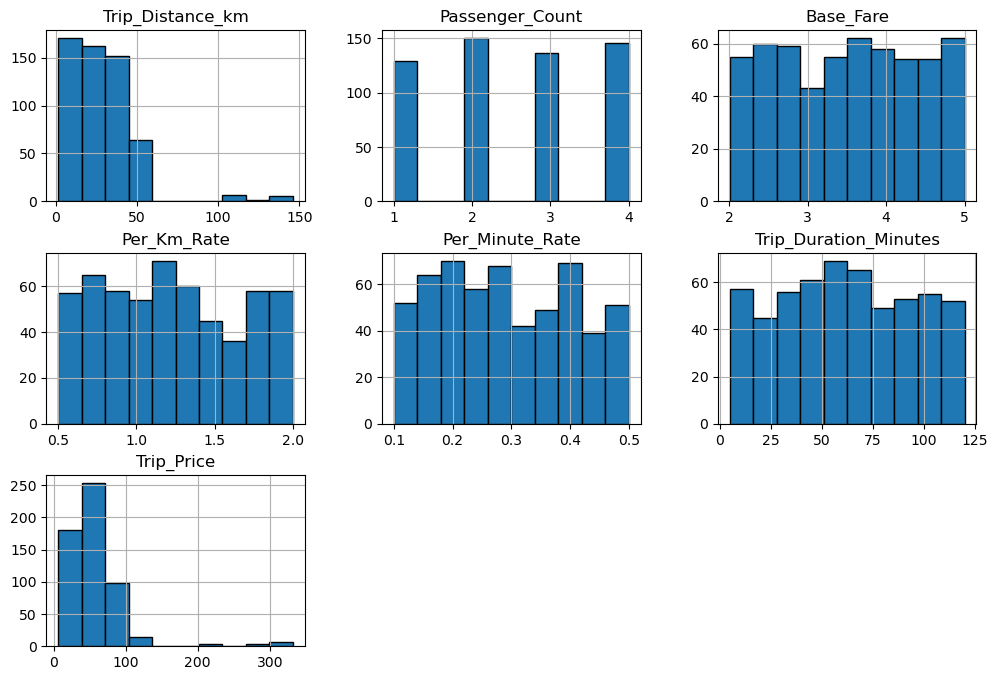

In [12]:
DF.hist(layout=(3,3),
       figsize=(12,8),
       edgecolor='black');

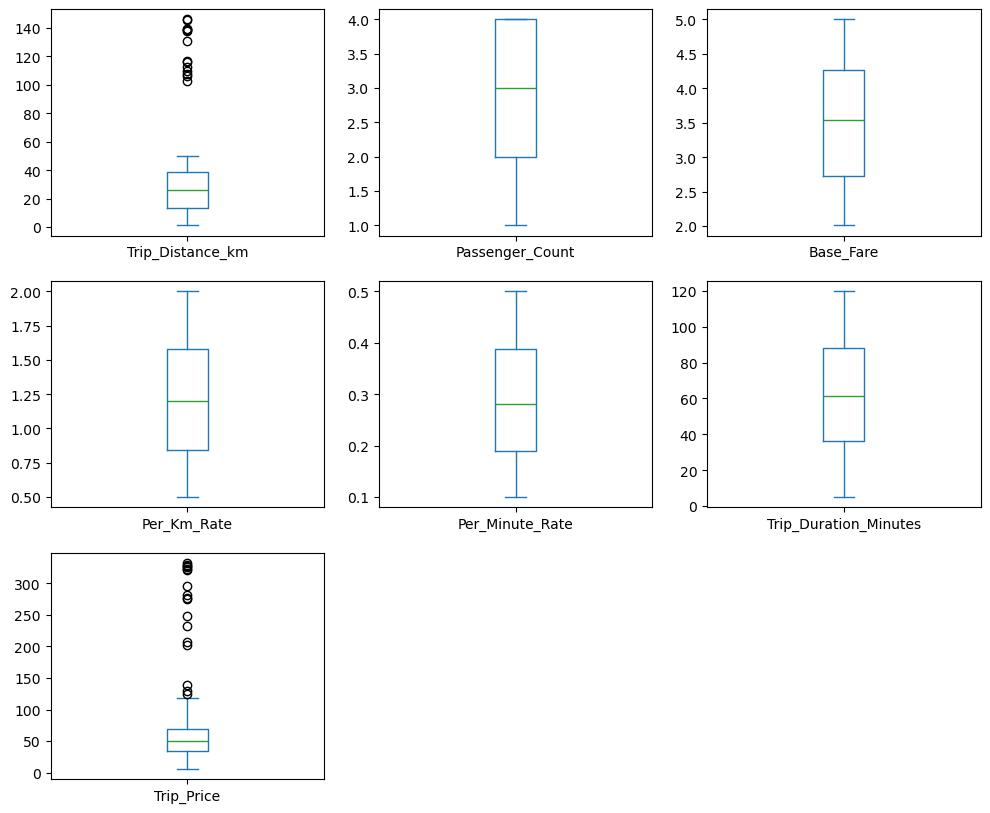

In [13]:
DF.drop(columns=['Day_of_Week','Traffic_Conditions','Weather','Time_of_Day']).plot(kind='box',
                                                                                  subplots=True,
                                                                                  layout=(3,3),
                                                                                  figsize=(12,10));

# Handling Outliers

In [14]:
DF.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,27.772941,2.533808,3.509893,1.219858,0.288221,61.825089,57.663525
std,21.153175,1.108915,0.871082,0.430351,0.114834,32.128436,43.958741
min,1.270000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,13.135000,2.000000,2.722500,0.840000,0.190000,36.530000,33.583875
50%,26.420000,3.000000,3.545000,1.200000,0.280000,61.210000,50.157850
75%,38.827500,4.000000,4.260000,1.580000,0.387500,88.435000,69.146575
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [15]:
Distance_25=13.135000
Distance_75=38.827500
IQR=Distance_75-Distance_25
min=1.270000
max=146.067047

In [16]:
MMIN=Distance_25-1.5*IQR
MMAX=Distance_75+1.5*IQR

In [17]:
MMIN , MMAX

(-25.40375000000001, 77.36625000000001)

In [18]:
DF[DF['Trip_Distance_km']>77.36]=np.nan

In [19]:
DF.isna().sum()

Trip_Distance_km         14
Time_of_Day              14
Day_of_Week              14
Passenger_Count          14
Traffic_Conditions       14
Weather                  14
Base_Fare                14
Per_Km_Rate              14
Per_Minute_Rate          14
Trip_Duration_Minutes    14
Trip_Price               14
dtype: int64

In [20]:
DF.dropna(inplace=True)

In [21]:
DF.isna().sum()

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [22]:
# No Outliers 
DF[DF['Trip_Distance_km']>77.36]

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price


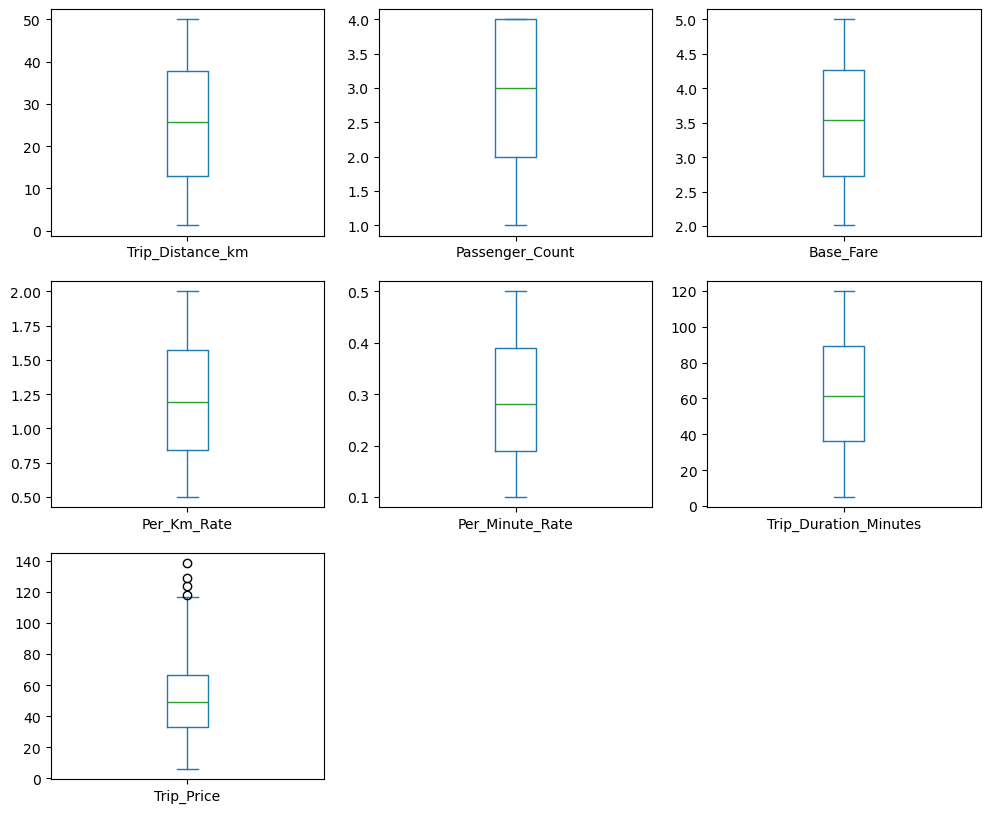

In [23]:
DF.drop(columns=['Day_of_Week','Traffic_Conditions','Weather','Time_of_Day']).plot(kind='box',
                                                                                  subplots=True,
                                                                                  layout=(3,3),
                                                                                  figsize=(12,10));

# Data PreProcessing For The Model 

C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

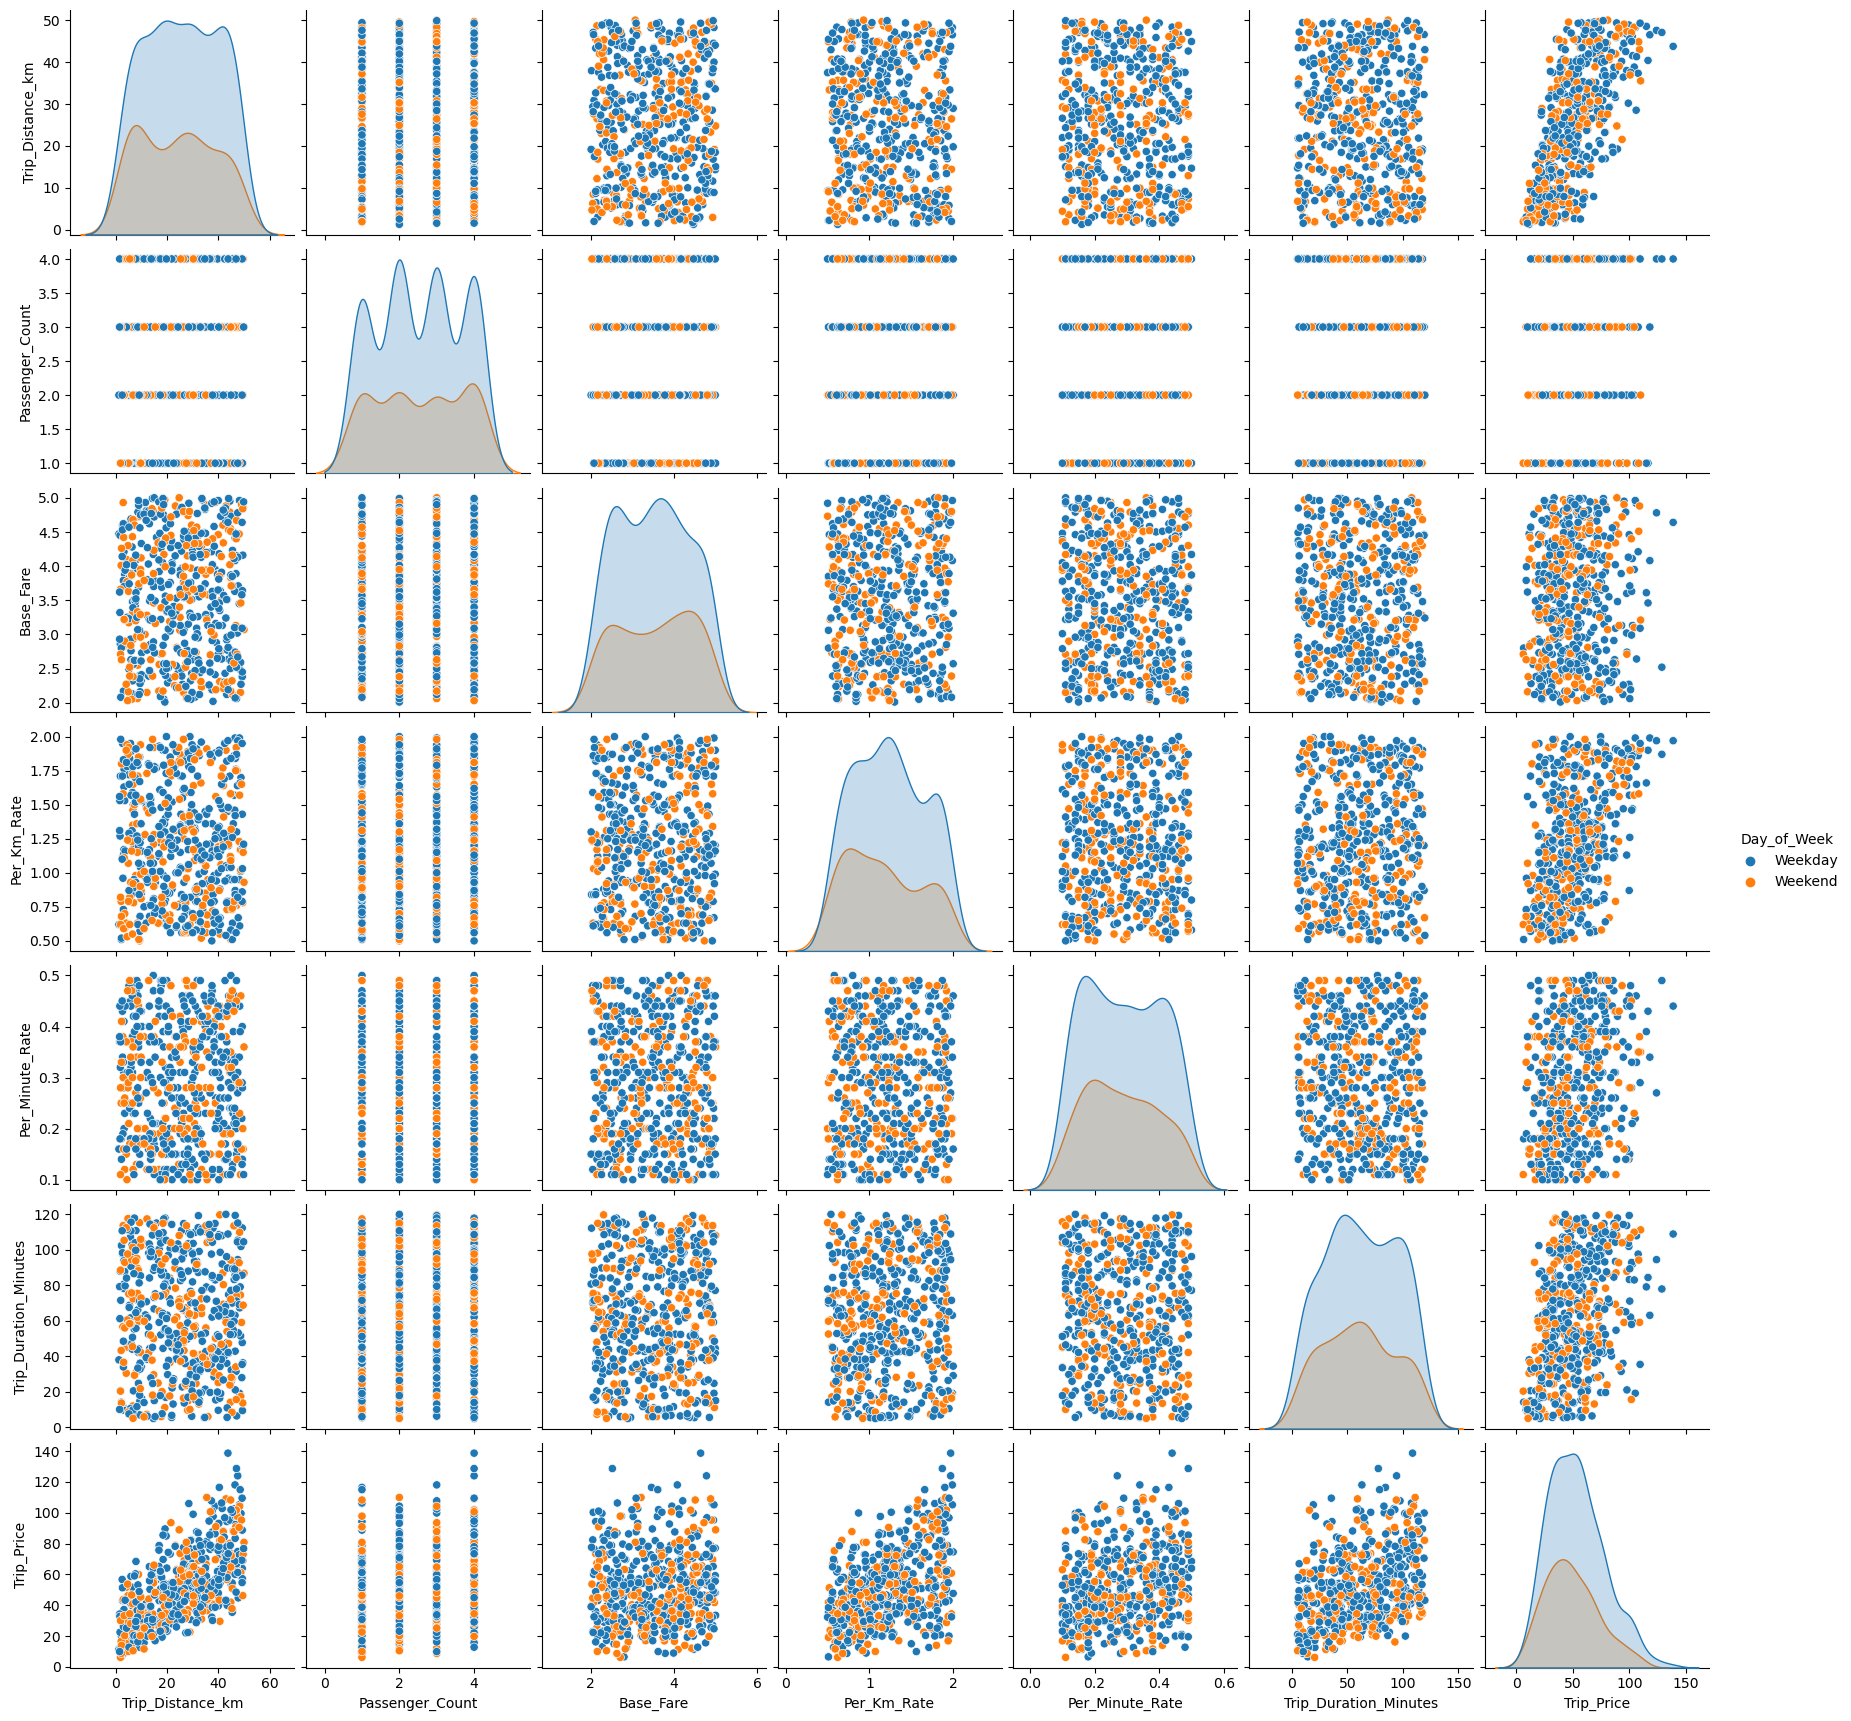

In [29]:
sns.pairplot(data=DF,hue='Day_of_Week');

C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


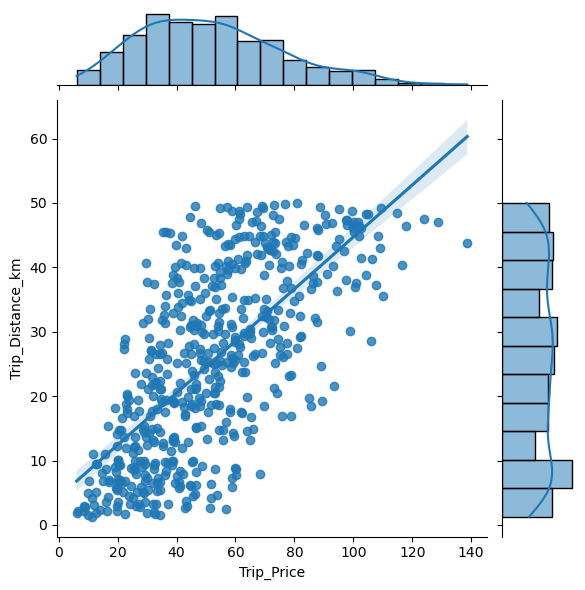

In [25]:
sns.jointplot(x=DF['Trip_Price'],y=DF['Trip_Distance_km'],kind='reg');

In [42]:
DF.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,25.289380,2.540146,3.513850,1.216679,0.288850,61.771442,51.882792
std,14.307509,1.110130,0.869567,0.428916,0.115312,32.291006,24.236402
min,1.270000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.875000,2.000000,2.727500,0.840000,0.190000,36.337500,33.303750
50%,25.640000,3.000000,3.545000,1.190000,0.280000,61.415000,48.998950
75%,37.757500,4.000000,4.262500,1.570000,0.390000,89.165000,66.700625
max,49.990000,4.000000,5.000000,2.000000,0.500000,119.840000,138.642500


In [32]:
numeric_columns=DF.describe().columns

In [36]:
DF[numeric_columns].corr(numeric_only=True)

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
Trip_Distance_km,1.000000,-0.012534,0.042169,-0.028646,-0.047410,-0.034116,0.683869
Passenger_Count,-0.012534,1.000000,0.090051,0.111509,0.079122,0.048787,0.092858
Base_Fare,0.042169,0.090051,1.000000,0.027042,-0.020305,0.057192,0.089105
Per_Km_Rate,-0.028646,0.111509,0.027042,1.000000,0.023450,0.081830,0.457165
Per_Minute_Rate,-0.047410,0.079122,-0.020305,0.023450,1.000000,-0.018119,0.253851
Trip_Duration_Minutes,-0.034116,0.048787,0.057192,0.081830,-0.018119,1.000000,0.380978
Trip_Price,0.683869,0.092858,0.089105,0.457165,0.253851,0.380978,1.000000


<Axes: >

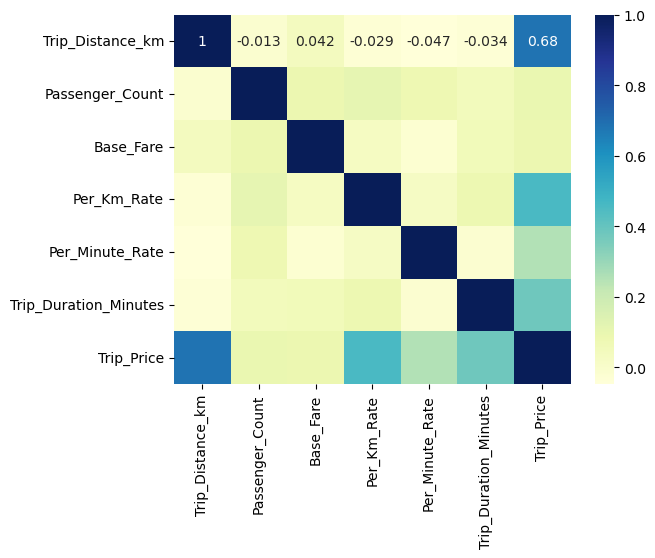

In [39]:
sns.heatmap(DF[numeric_columns].corr(), cmap="YlGnBu", annot=True)

In [41]:
X=np.array(DF[['Trip_Distance_km','Per_Km_Rate','Trip_Duration_Minutes','Per_Minute_Rate']])
y=np.array(DF['Trip_Price'])

In [54]:
np.linspace(0.1,0.5,5)

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [64]:
testing=np.linspace(0.1,0.9,9)

score=[]
for s in testing:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=s,random_state=0)
    Scaler=MinMaxScaler()
    Scaler.fit(X_train,y_train)
    Scaler.transform(X_train)
    Scaler.transform(X_test)
    Model=LinearRegression()
    Model.fit(X_train,y_train)
    r2=Model.score(X_train,y_train)
    score.append(r2)

Text(0.5, 1.0, 'By using test size = 42')

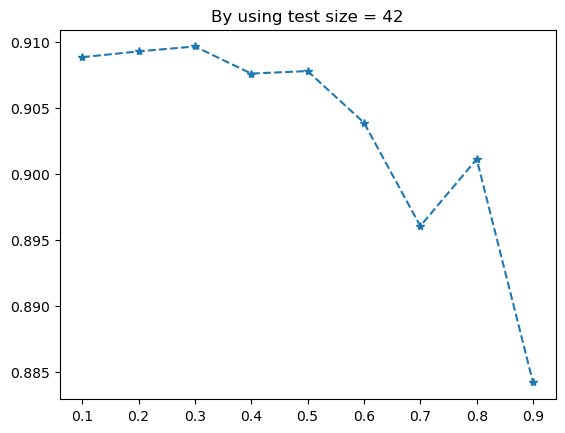

In [63]:
plt.plot(testing,score,'*--')
plt.title('By using test size = 42')


Text(0.5, 1.0, 'By using test size = 0')

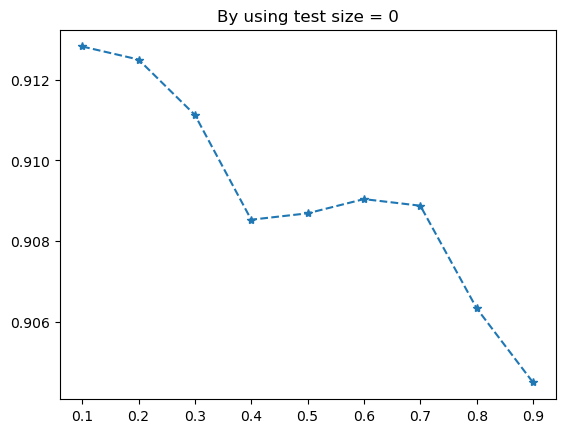

In [65]:
plt.plot(testing,score,'*--')
plt.title('By using test size = 0')

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
Scaler=MinMaxScaler()
Scaler.fit(X_train,y_train)
Scaler.transform(X_train)
Scaler.transform(X_test)
Model=LinearRegression()
Model.fit(X_train,y_train)
Model.score(X_train,y_train)

0.9125037277364682

In [69]:
y_pre=Model.predict(X_test)

In [70]:
res=y_pre-y_test

C:\Users\Empapy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

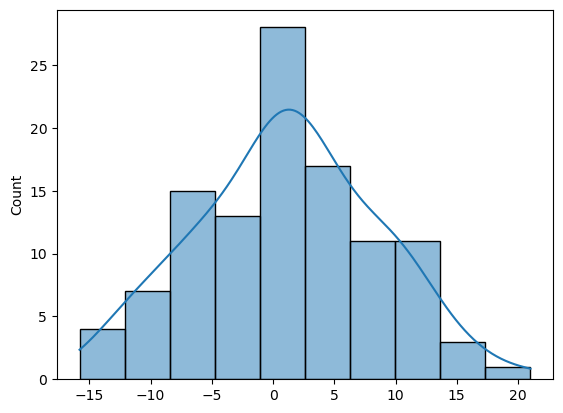

In [71]:
sns.histplot(res,kde=True)

# DashBoard....

In [144]:
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import base64

# Load dataset
df = DF.copy()

# Drop rows with missing critical values
df.dropna(subset=['Trip_Price', 'Trip_Distance_km', 'Passenger_Count', 'Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather'], inplace=True)

# Initialize the app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1(children="Taxi Trip Pricing Dashboard",style={'textAlign':'center','color':'blue'}),

    html.Div([
        html.Label("Time of Day"),
        dcc.Dropdown(
            id='time-dropdown',
            options=[{'label': i, 'value': i} for i in df['Time_of_Day'].unique()],
            value=None,
            placeholder="Select Time of Day"
        ),

        html.Label("Day of Week"),
        dcc.Dropdown(
            id='day-dropdown',
            options=[{'label': i, 'value': i} for i in df['Day_of_Week'].unique()],
            value=None,
            placeholder="Select Day of Week"
        ),

        html.Label("Traffic Conditions"),
        dcc.Dropdown(
            id='traffic-dropdown',
            options=[{'label': i, 'value': i} for i in df['Traffic_Conditions'].unique()],
            value=None,
            placeholder="Select Traffic Conditions"
        ),
    ], style={'width': '85%', 'textAlign': 'center','margin':'4%'}),

    html.Div([
        html.Label("Weather Conditions"),
        dcc.RadioItems(
            id='weather-radio',
            options=[{'label': i, 'value': i} for i in df['Weather'].unique()],
            value=None,
            labelStyle={'display': 'inline-block'}
        ),
    ], style={'width': '1000px', 'display': 'inline-block','textAlign':'center','margin-top':'10px'}),

    html.Div([
        html.Div([
            dcc.Graph(id='price-histogram')
        ], style={'width': '48%', 'display': 'inline-block', 'vertical-align': 'top', 'margin': '1%'}),

        html.Div([
            dcc.Graph(id='price-distance-scatter')
        ], style={'width': '48%', 'display': 'inline-block', 'vertical-align': 'top', 'margin': '1%'}),

        html.Div([
            html.Img(id='passenger-countplot', style={'width': '100%'})
        ], style={'width': '48%', 'display': 'inline-block', 'vertical-align': 'top', 'margin': '1%'})
    ], style={'width': '100%', 'display': 'flex', 'flex-wrap': 'wrap', 'justify-content': 'center', 'margin-top': '40px'})
])

@app.callback(
    Output('price-histogram', 'figure'),
    Output('price-distance-scatter', 'figure'),
    Output('passenger-countplot', 'src'),
    Input('time-dropdown', 'value'),
    Input('day-dropdown', 'value'),
    Input('traffic-dropdown', 'value'),
    Input('weather-radio', 'value')
)
def update_graphs(time, day, traffic, weather):
    filtered_df = df.copy()
    if time:
        filtered_df = filtered_df[filtered_df['Time_of_Day'] == time]
    if day:
        filtered_df = filtered_df[filtered_df['Day_of_Week'] == day]
    if traffic:
        filtered_df = filtered_df[filtered_df['Traffic_Conditions'] == traffic]
    if weather:
        filtered_df = filtered_df[filtered_df['Weather'] == weather]

    hist_fig = px.histogram(filtered_df, x='Trip_Price', nbins=30, title='Trip Price Distribution')
    scatter_fig = px.scatter(filtered_df, x='Trip_Distance_km', y='Trip_Price', title='Trip Price vs Distance (km)')

    # Seaborn countplot for Passenger Count
    plt.figure(figsize=(6, 4))
    sns.countplot(data=filtered_df, x='Passenger_Count', order=sorted(filtered_df['Passenger_Count'].unique()))
    plt.title('Passenger Count Distribution')
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')
    image_src = f"data:image/png;base64,{image_base64}"

    return hist_fig, scatter_fig, image_src

if __name__ == '__main__':
    app.run_server(debug=True)
